In [1]:
import pandas as pd
import numpy as np
path="/content/Final2.xlsx"
df=pd.read_excel(path,index_col=0,parse_dates=True)
print(df.tail())

              CPI    IPI  Reserves  Balance Commerciale        M3  \
Date                                                                
2022-01-01  144.5   95.8  24972743             0.834743   97045.0   
2022-02-01  145.0   92.6  25188219             0.708072   97883.0   
2022-03-01  146.2  100.3  24209796             0.769572   99055.0   
2022-04-01  148.2    NaN  25715075                  NaN  100243.0   
2022-05-01  149.5    NaN  26329963                  NaN       NaN   

            Exchange_rate (dollar/Euro)  Taux dinteret  Exchange1  Exchange2  
Date                                                                          
2022-01-01                       1.1156           6.19   3.284897     2.9591  
2022-02-01                       1.1199           6.25   3.243495     2.9074  
2022-03-01                       1.1101           6.26   3.264173     2.9147  
2022-04-01                       1.0540           6.26   3.284897     2.9591  
2022-05-01                       1.0713   

In [2]:
# Data cleaning 
# replace missing values with the median.
# impute the missing values and create the missing value indicator variables for each numeric column.
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values

for col in numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        med = df[col].median()
        df[col] = df[col].fillna(med)
df


imputing missing values for: IPI
imputing missing values for: Balance Commerciale
imputing missing values for: M3


,CPI,IPI,Reserves,Balance Commerciale,M3,Exchange_rate (dollar/Euro),Taux dinteret,Exchange1,Exchange2,IPI_ismissing,Balance Commerciale_ismissing,M3_ismissing
Date,,,,,,,,,,,,
2000-01-01,57.6,78.0,3001350,0.721995,12494.0,0.9791,5.88,1.248842,1.2755,False,False,False
2000-02-01,57.7,79.0,2540672,0.749059,12512.0,0.9714,5.88,1.258740,1.2958,False,False,False
2000-03-01,57.7,81.0,2377402,0.759163,12549.0,0.9553,5.88,1.258226,1.3171,False,False,False
2000-04-01,57.6,78.0,2114395,0.582870,12480.0,0.9085,5.88,1.250641,1.3766,False,False,False
2000-05-01,57.6,85.0,2080391,0.633519,12514.0,0.9303,5.88,1.278232,1.3740,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-01,144.5,95.8,24972743,0.834743,97045.0,1.1156,6.19,3.284897,2.9591,False,False,False
2022-02-01,145.0,92.6,25188219,0.708072,97883.0,1.1199,6.25,3.243495,2.9074,False,False,False
2022-03-01,146.2,100.3,24209796,0.769572,99055.0,1.1101,6.26,3.264173,2.9147,False,False,False


In [3]:
for x in ['IPI']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan
for x in ['Balance Commerciale']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan
for x in ['Taux dinteret']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan
print(df.isnull().sum())


CPI                              0
IPI                              2
Reserves                         0
Balance Commerciale              2
M3                               0
Exchange_rate (dollar/Euro)      0
Taux dinteret                    8
Exchange1                        0
Exchange2                        0
IPI_ismissing                    0
Balance Commerciale_ismissing    0
M3_ismissing                     0
dtype: int64


In [4]:
df = df.dropna(axis = 0)
X=df.iloc[:,[0,1,2,3,4,5,6,7]]
X.isnull().sum()

CPI                            0
IPI                            0
Reserves                       0
Balance Commerciale            0
M3                             0
Exchange_rate (dollar/Euro)    0
Taux dinteret                  0
Exchange1                      0
dtype: int64

Text(0.5, 1.0, 'Exchange1')

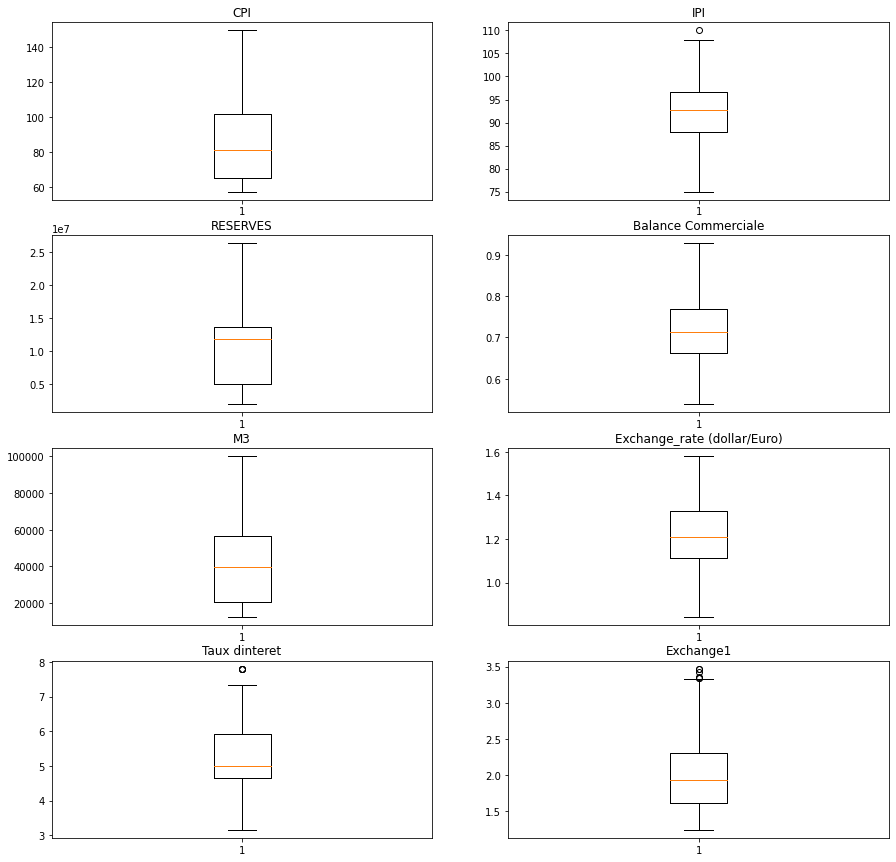

In [5]:
from matplotlib import pyplot as plt
fig, axs = plt.subplots(4, 2,figsize=(15,15))
axs[0, 0].boxplot(X['CPI'])
axs[0, 0].set_title('CPI')
axs[0, 1].boxplot(X['IPI'])
axs[0, 1].set_title('IPI')
axs[1, 0].boxplot(X['Reserves'])
axs[1, 0].set_title('RESERVES')
axs[1, 1].boxplot(X['Balance Commerciale'])
axs[1, 1].set_title('Balance Commerciale')
axs[2, 0].boxplot(X['M3'])
axs[2, 0].set_title('M3')
axs[2, 1].boxplot(X['Exchange_rate (dollar/Euro)'])
axs[2, 1].set_title('Exchange_rate (dollar/Euro)')
axs[3, 0].boxplot(X['Taux dinteret'])
axs[3, 0].set_title('Taux dinteret')
axs[3, 1].boxplot(X['Exchange1'])
axs[3, 1].set_title('Exchange1')

In [6]:
for x in ['IPI']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan
for x in ['Exchange1']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan
for x in ['Taux dinteret']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan
print(df.isnull().sum())


CPI                              0
IPI                              1
Reserves                         0
Balance Commerciale              0
M3                               0
Exchange_rate (dollar/Euro)      0
Taux dinteret                    4
Exchange1                        6
Exchange2                        0
IPI_ismissing                    0
Balance Commerciale_ismissing    0
M3_ismissing                     0
dtype: int64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [7]:
df = df.dropna(axis = 0)
X=df.iloc[:,[0,1,2,3,4,5,6,7]]
X.isnull().sum()

CPI                            0
IPI                            0
Reserves                       0
Balance Commerciale            0
M3                             0
Exchange_rate (dollar/Euro)    0
Taux dinteret                  0
Exchange1                      0
dtype: int64

Text(0.5, 1.0, 'Exchange1')

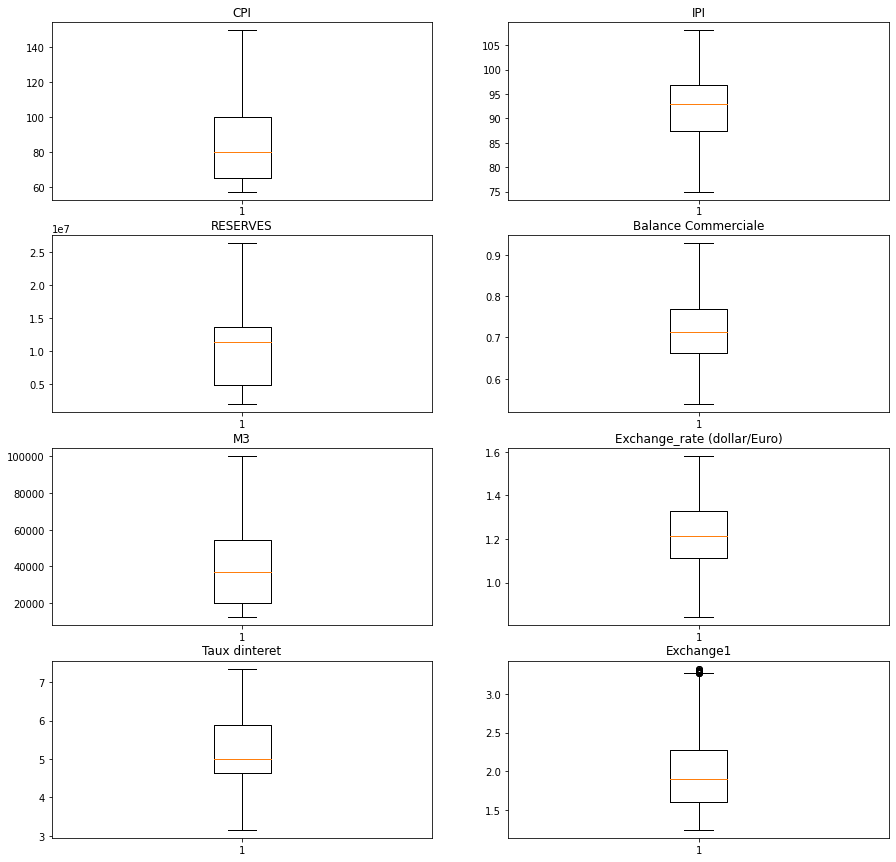

In [8]:
from matplotlib import pyplot as plt
fig, axs = plt.subplots(4, 2,figsize=(15,15))
axs[0, 0].boxplot(X['CPI'])
axs[0, 0].set_title('CPI')
axs[0, 1].boxplot(X['IPI'])
axs[0, 1].set_title('IPI')
axs[1, 0].boxplot(X['Reserves'])
axs[1, 0].set_title('RESERVES')
axs[1, 1].boxplot(X['Balance Commerciale'])
axs[1, 1].set_title('Balance Commerciale')
axs[2, 0].boxplot(X['M3'])
axs[2, 0].set_title('M3')
axs[2, 1].boxplot(X['Exchange_rate (dollar/Euro)'])
axs[2, 1].set_title('Exchange_rate (dollar/Euro)')
axs[3, 0].boxplot(X['Taux dinteret'])
axs[3, 0].set_title('Taux dinteret')
axs[3, 1].boxplot(X['Exchange1'])
axs[3, 1].set_title('Exchange1')

Text(0.5, 1.0, 'Exchange1')

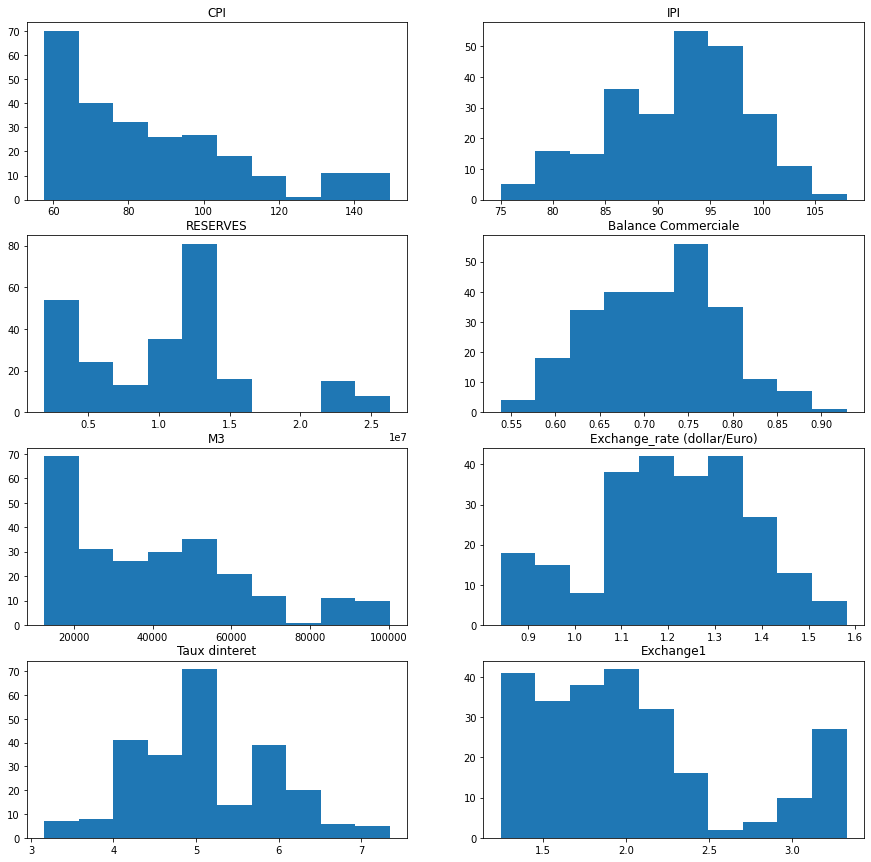

In [9]:

from matplotlib import pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(4, 2,figsize=(15,15))
axs[0, 0].hist(df['CPI'])
axs[0, 0].set_title('CPI')
axs[0, 1].hist(df['IPI'])
axs[0, 1].set_title('IPI')
axs[1, 0].hist(df['Reserves'])
axs[1, 0].set_title('RESERVES')
axs[1, 1].hist(df['Balance Commerciale'])
axs[1, 1].set_title('Balance Commerciale')
axs[2, 0].hist(df['M3'])
axs[2, 0].set_title('M3')
axs[2, 1].hist(df['Exchange_rate (dollar/Euro)'])
axs[2, 1].set_title('Exchange_rate (dollar/Euro)')
axs[3, 0].hist(df['Taux dinteret'])
axs[3, 0].set_title('Taux dinteret')
axs[3, 1].hist(df['Exchange1'])
axs[3, 1].set_title('Exchange1')

In [10]:
import math
import numpy as np
from scipy.stats import shapiro 
#perform Shapiro-Wilk test for normality
print(shapiro(df['CPI']))
print(shapiro(df['IPI']))
print(shapiro(df['Reserves']))
print(shapiro(df['Balance Commerciale']))
print(shapiro(df['M3']))
print(shapiro(df['Exchange_rate (dollar/Euro)']))
print(shapiro(df['Taux dinteret']))
print(shapiro(df['Exchange1']))

ShapiroResult(statistic=0.9031597971916199, pvalue=1.68592639848697e-11)
ShapiroResult(statistic=0.9796878099441528, pvalue=0.0013568553840741515)
ShapiroResult(statistic=0.9133042693138123, pvalue=9.32344965121068e-11)
ShapiroResult(statistic=0.9934659004211426, pvalue=0.3587811589241028)
ShapiroResult(statistic=0.9140382409095764, pvalue=1.0604168931838132e-10)
ShapiroResult(statistic=0.9803771376609802, pvalue=0.0017604429740458727)
ShapiroResult(statistic=0.9762112498283386, pvalue=0.0003817098622675985)
ShapiroResult(statistic=0.9006466269493103, pvalue=1.1242276207190649e-11)


In [11]:
from scipy.stats import kstest
#perform Kolmogorov-Smirnov test for normality
print(kstest(df['CPI'],'norm'))
print(kstest(df['IPI'],'norm'))
print(kstest(df['Reserves'],'norm'))
print(kstest(df['Balance Commerciale'],'norm'))
print(kstest(df['M3'],'norm'))
print(kstest(df['Exchange_rate (dollar/Euro)'],'norm'))
print(kstest(df['Taux dinteret'],'norm'))
print(kstest(df['Exchange1'],'norm'))

KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=0.7082596597307466, pvalue=8.415854646020217e-125)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=0.8000220508692671, pvalue=5.3481018960976945e-170)
KstestResult(statistic=0.9992111543056245, pvalue=0.0)
KstestResult(statistic=0.8933800728140544, pvalue=1.634815930506448e-239)


In [12]:
# import modules
import matplotlib.pyplot as mp
import seaborn as sns
import pandas as pd
from scipy.stats import spearmanr
L=[]
for i in range (8):
  for j in range (8):
    corr , _ = spearmanr(df.iloc[:,i], df.iloc[:,j])
    L.append(corr)
print(len(L))
# new_data_base
d = {
    "CPI": [L[p] for p in range(8)],
    "IPI":  [L[p] for p in range(8,16)],
    "Reserves":  [L[p] for p in range(16,24)],
    "Balance Commerciale":  [L[p] for p in range(24,32)],
    "M3": [L[p] for p in range(32,40)],
    "Exchange_rate(dollar/Euro)": [L[p] for p in range(40,48)],
    "Taux dinteret": [L[p] for p in range(48,56)],
    "Exchange1":[L[p] for p in range(56,64)],
}
df3 = pd.DataFrame(data=d)
index_=df.index.to_list()
df3.to_excel("df3.xlsx")

64


In [13]:
# Data scalling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X=df.iloc[:,[0,1,2,3,4,5,6,7]]
df2=MinMaxScaler().fit_transform(X)
df2=pd.DataFrame(data=df2)
df2

,0,1,2,3,4,5,6,7
0,0.000000,0.090909,0.046003,0.471197,0.000160,0.185801,0.649165,0.001987
1,0.001088,0.121212,0.027164,0.540581,0.000365,0.175389,0.649165,0.006743
2,0.001088,0.181818,0.020488,0.566485,0.000786,0.153617,0.649165,0.006496
3,0.000000,0.090909,0.009732,0.114522,0.000000,0.090331,0.649165,0.002852
4,0.000000,0.303030,0.008342,0.244370,0.000387,0.119811,0.649165,0.016108
...,...,...,...,...,...,...,...,...
241,0.945593,0.630303,0.944498,0.760248,0.963561,0.370385,0.723150,0.980226
242,0.951034,0.533333,0.953310,0.435503,0.973109,0.376200,0.737470,0.960334
243,0.964091,0.766667,0.913298,0.593170,0.986464,0.362948,0.739857,0.970269
244,0.985854,0.533333,0.974855,0.449580,1.000000,0.287086,0.739857,0.980226


In [14]:
# new_data_base
d = {
    "CPI": [df2[0][p] for p in range(df2.shape[0])],
    "IPI": [df2[1][p] for p in range(df2.shape[0])],
    "Reserves": [df2[2][p] for p in range(df2.shape[0])],
    "Balance Commerciale": [df2[3][p] for p in range(df2.shape[0])],
    "M3": [df2[4][p] for p in range(df2.shape[0])],
    "Exchange_rate(dollar/Euro)": [df2[5][p] for p in range(df2.shape[0])],
    "Taux dinteret": [df2[6][p] for p in range(df2.shape[0])],
    "Exchange1": [df2[7][p] for p in range(df2.shape[0])],
}
df2 = pd.DataFrame(data=d)
index_=df.index.to_list()
df2.index = index_
df2.head()

,CPI,IPI,Reserves,Balance Commerciale,M3,Exchange_rate(dollar/Euro),Taux dinteret,Exchange1
2000-01-01,0.000000,0.090909,0.046003,0.471197,0.000160,0.185801,0.649165,0.001987
2000-02-01,0.001088,0.121212,0.027164,0.540581,0.000365,0.175389,0.649165,0.006743
2000-03-01,0.001088,0.181818,0.020488,0.566485,0.000786,0.153617,0.649165,0.006496
2000-04-01,0.000000,0.090909,0.009732,0.114522,0.000000,0.090331,0.649165,0.002852
2000-05-01,0.000000,0.303030,0.008342,0.244370,0.000387,0.119811,0.649165,0.016108


Feature: 0, Score: 1.17868
Feature: 1, Score: -0.01106
Feature: 2, Score: -0.33158
Feature: 3, Score: 0.00619
Feature: 4, Score: 0.16883
Feature: 5, Score: 0.23053
Feature: 6, Score: 0.11976


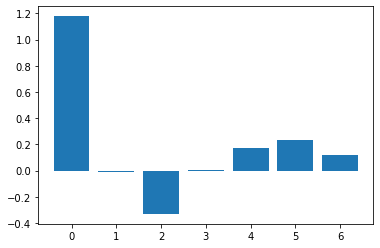

In [15]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
# define dataset
X=df2.iloc[:,[0,1,2,3,4,5,6]]
y=df2.iloc[:,7]
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [16]:
import statsmodels.api as sm
# define dataset
X=df2.iloc[:,[0,3,4,5,6]]
y=df2.iloc[:,7]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# define the model
model = LinearRegression()
# fit the model
model.fit(X_train, y_train)
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)

# with statsmodels
x = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test) 
print_model = model.summary()
print(print_model)

Intercept: 
 -0.10028973848928713
Coefficients: 
 [ 0.86545393 -0.02770111  0.18776834  0.17429664  0.16759643]
                                 OLS Regression Results                                
Dep. Variable:              Exchange1   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                              3319.
Date:                Wed, 09 Nov 2022   Prob (F-statistic):                   1.62e-183
Time:                        09:15:43   Log-Likelihood:                          303.63
No. Observations:                 196   AIC:                                     -597.3
Df Residuals:                     191   BIC:                                     -580.9
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
        

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [17]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
k=predictions.to_list()
t=y_test.to_list()
arma_rmse = np.sqrt(mean_squared_error(t, k))
print("RMSE: ",arma_rmse)
arma_mse= mean_squared_error(t, k)
print("MSE :",arma_mse)
MAE=mean_absolute_error(t,k)
print("MAE :",MAE)
Variance=explained_variance_score(t, k)
print("Variance",Variance)

RMSE:  0.0423554383089191
MSE : 0.0017939831543406514
MAE : 0.029275876283937814
Variance 0.9773597190142644


[0.9667219  0.9728725  0.96704009 0.97125922 0.98472785 0.97668954
 0.73975629 0.93662455 0.96532073 0.98568613]


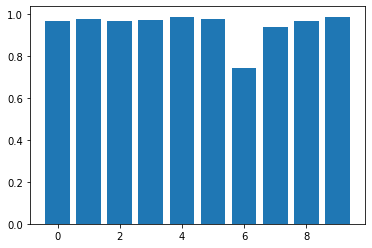

0.95 accuracy with a standard deviation of 0.07


In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
# define the model
model = LinearRegression()
# fit the model
model.fit(X_train, y_train)
cv1 = KFold(n_splits=10, shuffle=True)
scores = cross_val_score(model, X, y, cv=cv1)
print(scores)
# plot feature importance
plt.bar([x for x in range(len(scores))], scores)
plt.show()
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

In [19]:
!pip install sklearn-contrib-py-earth
!pip install git+https://github.com/scikit-learn-contrib/py-earth@v0.2dev
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.datasets import make_regression
from pyearth import Earth

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 24.8 MB/s 
  ERROR: Failed building wheel for sklearn-contrib-py-earth
  Running setup.py clean for sklearn-contrib-py-earth
Failed to build sklearn-contrib-py-earth
    Running setup.py install for sklearn-contrib-py-earth ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-_dtp9d8m/sklearn-contrib-py-earth_010c22bcd09740238a37498023caf5ba/setup.py'"'"'; __file__='"'"'/tmp/pip-install-_dtp9d8m/sklearn-contrib-py-earth_010c22bcd09740238a37498023caf5ba/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /

In [20]:
import pandas as pd # for data manipulation
import numpy as np # for data manipulation
from sklearn.linear_model import LinearRegression # for building a linear regression model
from pyearth import Earth # for building a MARS model
import plotly.graph_objects as go # for data visualization
import plotly.express as px # for data visualization

In [21]:
# --- Select variables to use in the two models --- 
# Note, we need X to be a 2D array, hence reshape
X=df2.iloc[:,[0,1,2,3,5,6]]
y=df2.iloc[:,7]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# --- Define and fit the two models ---
model2 = Earth(max_terms=500, max_degree=1) # note, terms in brackets are the hyperparameters 
MARS = model2.fit(X_train, y_train)
print(model2.summary_feature_importances(sort_by='gcv'))

# --- Print model summary ---
# LR
print("MARS Model")
print("--------------------------------------")
#print("Intercept: ", MARS.intercept_)
print("Slope: ", MARS.coef_)

print("")
print("<><><><><><><><><><><><><><><><><><><>")
print("")

# MARS
print(MARS.summary())


MARS Model
--------------------------------------
Slope:  [[ 0.7477745  -0.25395453 -0.10920368  0.11518777  0.34681693  1.06470503
  -1.98337515  0.33902051]]

<><><><><><><><><><><><><><><><><><><>

Earth Model
-------------------------------------------------------------
Basis Function                          Pruned  Coefficient  
-------------------------------------------------------------
(Intercept)                             No      0.747775     
h(CPI-0.847661)                         Yes     None         
h(0.847661-CPI)                         Yes     None         
h(Exchange_rate(dollar/Euro)-0.464097)  No      -0.253955    
h(0.464097-Exchange_rate(dollar/Euro))  No      -0.109204    
h(Taux dinteret-0.391408)               No      0.115188     
h(0.391408-Taux dinteret)               Yes     None         
h(Reserves-0.480829)                    Yes     None         
h(0.480829-Reserves)                    Yes     None         
h(CPI-0.453754)                         No

In [22]:
import numpy as np
from sklearn.metrics import mean_squared_error
prediction2=model2.predict(X_test)
k=prediction2
#k2=prediction1
t=y_test.to_list()
arma_rmse1 = np.sqrt(mean_squared_error(k, t))
#arma_rmse2 = np.sqrt(mean_squared_error(k2, t))
print("RMSE: ",arma_rmse1)
arma_mse1= mean_squared_error(t, k)
print("MSE :",arma_mse1)
MAE=mean_absolute_error(t,k)
print("MAE :",MAE)
Variance=explained_variance_score(t, k)
print("Variance",Variance)

RMSE:  0.023282672696225682
MSE : 0.0005420828478795729
MAE : 0.015418186191203309
Variance 0.9944074527491537


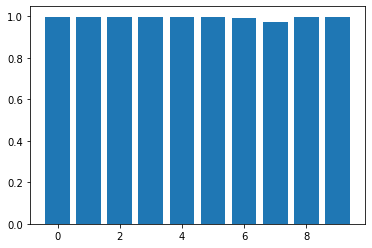

0.99 accuracy with a standard deviation of 0.01


In [23]:
cv1 = KFold(n_splits=10, shuffle=True)
scores = cross_val_score(MARS, X, y, cv=cv1)
# plot feature importance
plt.bar([x for x in range(len(scores))], scores)
plt.show()
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


RMSE:  0.016662
MSE : 0.00027762513171747426
MAE : 0.011677973227944177
Variance 0.9973033212905666


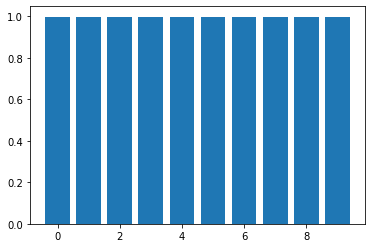

1.00 accuracy with a standard deviation of 0.00


In [24]:
from sklearn.metrics import mean_squared_error # for calculating the cost function
from sklearn.ensemble import RandomForestRegressor # for building the model
# Initializing the Random Forest Regression model with 10 decision trees
model = RandomForestRegressor(n_estimators = 10, random_state = 30)

# Fitting the Random Forest Regression model to the data
model.fit(X_train,y_train)
# Predicting the target values of the test set
y_pred = model.predict(X_test)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.6f'))
print("\nRMSE: ", rmse)
t=y_test.to_list()
arma_mse1= mean_squared_error(t,y_pred)
print("MSE :",arma_mse1)
MAE=mean_absolute_error(t,y_pred)
print("MAE :",MAE)
Variance=explained_variance_score(t, y_pred)
print("Variance",Variance)
# Cross validation
cv1 = KFold(n_splits=10, shuffle=True)
scores = cross_val_score(model, X, y, cv=cv1)
# plot feature importance
plt.bar([x for x in range(len(scores))], scores)
plt.show()
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))



RMSE:  0.073
MSE : 0.005318663563483463
MAE : 0.06328337116139979
Variance 0.9454807871648125


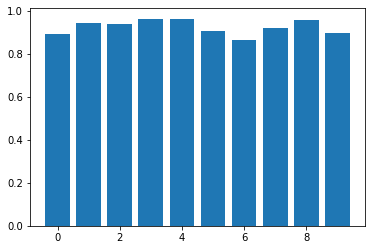

0.93 accuracy with a standard deviation of 0.03


In [25]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X_train,y_train)
y_pred2 = regressor.predict(X_test)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred2)), '.3f'))
print("\nRMSE: ", rmse)
t=y_test.to_list()
arma_mse1= mean_squared_error(t,y_pred2)
print("MSE :",arma_mse1)
MAE=mean_absolute_error(t,y_pred2)
print("MAE :",MAE)
Variance=explained_variance_score(t, y_pred2)
print("Variance",Variance)
# Cross validation
cv1 = KFold(n_splits=10, shuffle=True)
scores = cross_val_score(regressor, X_train, y_train, cv=cv1)
# plot feature importance
plt.bar([x for x in range(len(scores))], scores)
plt.show()
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

In [26]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [27]:
import pandas as pd
import numpy as np
path="/content/Final2.xlsx"
df=pd.read_excel(path,index_col=0,parse_dates=True)
print(df.tail())


              CPI    IPI  Reserves  Balance Commerciale        M3  \
Date                                                                
2022-01-01  144.5   95.8  24972743             0.834743   97045.0   
2022-02-01  145.0   92.6  25188219             0.708072   97883.0   
2022-03-01  146.2  100.3  24209796             0.769572   99055.0   
2022-04-01  148.2    NaN  25715075                  NaN  100243.0   
2022-05-01  149.5    NaN  26329963                  NaN       NaN   

            Exchange_rate (dollar/Euro)  Taux dinteret  Exchange1  Exchange2  
Date                                                                          
2022-01-01                       1.1156           6.19   3.284897     2.9591  
2022-02-01                       1.1199           6.25   3.243495     2.9074  
2022-03-01                       1.1101           6.26   3.264173     2.9147  
2022-04-01                       1.0540           6.26   3.284897     2.9591  
2022-05-01                       1.0713   

In [28]:
# Data cleaning 
# replace missing values with the median.
# impute the missing values and create the missing value indicator variables for each numeric column.
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values

for col in numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        med = df[col].median()
        df[col] = df[col].fillna(med)
df


imputing missing values for: IPI
imputing missing values for: Balance Commerciale
imputing missing values for: M3


,CPI,IPI,Reserves,Balance Commerciale,M3,Exchange_rate (dollar/Euro),Taux dinteret,Exchange1,Exchange2,IPI_ismissing,Balance Commerciale_ismissing,M3_ismissing
Date,,,,,,,,,,,,
2000-01-01,57.6,78.0,3001350,0.721995,12494.0,0.9791,5.88,1.248842,1.2755,False,False,False
2000-02-01,57.7,79.0,2540672,0.749059,12512.0,0.9714,5.88,1.258740,1.2958,False,False,False
2000-03-01,57.7,81.0,2377402,0.759163,12549.0,0.9553,5.88,1.258226,1.3171,False,False,False
2000-04-01,57.6,78.0,2114395,0.582870,12480.0,0.9085,5.88,1.250641,1.3766,False,False,False
2000-05-01,57.6,85.0,2080391,0.633519,12514.0,0.9303,5.88,1.278232,1.3740,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-01,144.5,95.8,24972743,0.834743,97045.0,1.1156,6.19,3.284897,2.9591,False,False,False
2022-02-01,145.0,92.6,25188219,0.708072,97883.0,1.1199,6.25,3.243495,2.9074,False,False,False
2022-03-01,146.2,100.3,24209796,0.769572,99055.0,1.1101,6.26,3.264173,2.9147,False,False,False


In [29]:
data=df.iloc[:,7]
print(data)
dataset=data.values
training_data_len=math.ceil(len(dataset)*.8)
training_data_len

Date 
2000-01-01    1.248842
2000-02-01    1.258740
2000-03-01    1.258226
2000-04-01    1.250641
2000-05-01    1.278232
                ...   
2022-01-01    3.284897
2022-02-01    3.243495
2022-03-01    3.264173
2022-04-01    3.284897
2022-05-01    3.247058
Name: Exchange1, Length: 269, dtype: float64


216

In [30]:
train_data=dataset[0:training_data_len]
print(train_data)
print(len(train_data))
x_train=[]
y_train=[]
for i in range (5,len(train_data)):
  x_train.append(train_data[i-5:i])
  y_train.append(train_data[i])
print(x_train)
print(y_train)


[1.24884205 1.25874012 1.25822563 1.2506411  1.2782322  1.2742926
 1.27035792 1.25521164 1.2546221  1.24470596 1.26551932 1.28902165
 1.28466432 1.28565696 1.2753408  1.2705994  1.2706432  1.2759856
 1.28462115 1.30373288 1.30509383 1.30358514 1.30070964 1.29401279
 1.28984958 1.29081571 1.306419   1.32138352 1.34459388 1.37186175
 1.34966268 1.35567571 1.3678778  1.35994968 1.37647782 1.39907067
 1.41408384 1.42343964 1.43127615 1.45059192 1.48318812 1.46288454
 1.45900338 1.4303443  1.47153108 1.47901572 1.49925    1.5260829
 1.51964064 1.53250538 1.515776   1.51774688 1.5357282  1.536392
 1.5325647  1.53676479 1.56278946 1.5742932  1.6142789  1.63370274
 1.6126902  1.62464535 1.62075928 1.61392392 1.59279527 1.59965068
 1.60933644 1.61416134 1.62121446 1.61997902 1.6076454  1.60840298
 1.63096162 1.61844375 1.63694496 1.66190472 1.68738084 1.68498102
 1.69086148 1.69517541 1.6879578  1.6834896  1.716264   1.7082807
 1.7079849  1.72377128 1.73546858 1.7572218  1.75104248 1.7561902
 1

In [31]:
x_train,y_train=np.array(x_train),np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],5,1))
x_train

array([[[1.24884205],
        [1.25874012],
        [1.25822563],
        [1.2506411 ],
        [1.2782322 ]],

       [[1.25874012],
        [1.25822563],
        [1.2506411 ],
        [1.2782322 ],
        [1.2742926 ]],

       [[1.25822563],
        [1.2506411 ],
        [1.2782322 ],
        [1.2742926 ],
        [1.27035792]],

       ...,

       [[2.74645196],
        [2.80598256],
        [2.90501244],
        [2.889084  ],
        [2.9184432 ]],

       [[2.80598256],
        [2.90501244],
        [2.889084  ],
        [2.9184432 ],
        [2.9118276 ]],

       [[2.90501244],
        [2.889084  ],
        [2.9184432 ],
        [2.9118276 ],
        [2.94341009]]])

In [32]:
from keras.layers import Dropout
#Build LSTM model
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50,return_sequences = True))
model.add(Dropout(0.2))
# Adding a fifth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))


In [33]:
#Compile model
model.compile(optimizer='adam',loss='mean_squared_error')

In [34]:
#train model
model.fit(x_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
7/7 [==============================] - 9s 16ms/step - loss: 3.4313
Epoch 2/100
7/7 [==============================] - 0s 15ms/step - loss: 2.5710
Epoch 3/100
7/7 [==============================] - 0s 16ms/step - loss: 0.6409
Epoch 4/100
7/7 [==============================] - 0s 16ms/step - loss: 0.4502
Epoch 5/100
7/7 [==============================] - 0s 17ms/step - loss: 0.2342
Epoch 6/100
7/7 [==============================] - 0s 16ms/step - loss: 0.2072
Epoch 7/100
7/7 [==============================] - 0s 16ms/step - loss: 0.1457
Epoch 8/100
7/7 [==============================] - 0s 16ms/step - loss: 0.1185
Epoch 9/100
7/7 [==============================] - 0s 16ms/step - loss: 0.1141
Epoch 10/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0972
Epoch 11/100
7/7 [==============================] - 0s 19ms/step - loss: 0.0992
Epoch 12/100
7/7 [==============================] - 0s 16ms/step - loss: 0.0946
Epoch 13/100
7/7 [==============================]

In [35]:
test_data=dataset[training_data_len-5:]
x_test=[]
y_test=dataset[training_data_len:]
for i in range (5,len(test_data)):
  x_test.append(test_data[i-5:i])

In [36]:
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
predictions=model.predict(x_test)
L=[]
for i in range (len(predictions)):
  L.append(predictions[i][0])
rmse=np.sqrt(np.mean(predictions-y_test)**2)
print(rmse)
mse=np.mean(predictions-y_test)**2
print(mse)
MAE=mean_absolute_error(y_test,L)
print("MAE :",MAE)
Variance=explained_variance_score(y_test,L)
print("Variance",Variance)


2/2 [==============================] - 5s 20ms/step
0.04757447278212985
0.0022633304604976136
MAE : 0.07865482485675396
Variance 0.3847901663795579
